## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [3]:
raise Exception("You don't want to 'run all'. Jump down to bookmark.")

Exception: You don't want to 'run all'. Jump down to bookmark.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
from bs_ds.imports import *

bs_ds v. 0.7.4 ... read the docs at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Module/Package Handle
pandas                               pd
numpy                                np
matplotlib                          mpl
matplotlib.pyplot                   plt
seaborn                             sns

In [2]:
df = pd.read_csv('russian_troll_tweets_eng_only_date_pub_index.csv', encoding='utf-8',index_col=0)

df['troll_tweet'] = 1
# Recast date_published as datetime and make index
df['date_published'] = pd.to_datetime(df['publish_date'])
df.set_index('date_published', inplace=True)
print('Changed index to datetime "date_published".')

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Changed index to datetime "date_published".


In [7]:
# # Drop un-needed columns
# cols_to_drop = ['publish_date','language']
# for col in cols_to_drop:

#     df.drop(col, axis=1, inplace=True)
#     print(f'Dropped {col}.')


# # Recast categorical columns
# cols_to_cats = ['region','post_type','account_type','account_category']
# for col in cols_to_cats:

#     df[col] = df[col].astype('category')
#     print(f'Converted {col} to category.')


# Drop problematic nan in 'contet'
df.dropna(subset=['content'],inplace=True) # Dropping the 1 null value 

df.head()

external_author_id  author  \
date_published                                    
2017-10-01 19:58:00        9.060000e+17  10_GOP   
2017-10-01 22:43:00        9.060000e+17  10_GOP   
2017-10-01 23:52:00        9.060000e+17  10_GOP   
2017-10-01 02:47:00        9.060000e+17  10_GOP   
2017-10-01 02:52:00        9.060000e+17  10_GOP   

                                                               content  \
date_published                                                           
2017-10-01 19:58:00  "We have a sitting Democrat US Senator on tria...   
2017-10-01 22:43:00  Marshawn Lynch arrives to game in anti-Trump s...   
2017-10-01 23:52:00  JUST IN: President Trump dedicates Presidents ...   
2017-10-01 02:47:00  Dan Bongino: "Nobody trolls liberals better th...   
2017-10-01 02:52:00  '@SenatorMenendez @CarmenYulinCruz Doesn't mat...   

                      region language     publish_date  following  followers  \
date_published                                                                 
2017-10-01 19:58:00  Unknown  English  10/1/2017 19:58       1052       9636   
2017-10-01 22:43:00  Unknown  English  10/1/2017 22:43       1054       9637   
2017-10-01 23:52:00  Unknown  English  10/1/2017 23:52       1062       9642   
2017-10-01 02:47:00  Unknown  English   10/1/2017 2:47       1050       9644   
2017-10-01 02:52:00  Unknown  English   10/1/2017 2:52       1050       9644   

                     updates  post_type account_type  retweet  \
date_published                                                  
2017-10-01 19:58:00      253        NaN        Right        0   
2017-10-01 22:43:00      254        NaN        Right        0   
2017-10-01 23:52:00      256        NaN        Right        0   
2017-10-01 02:47:00      247        NaN        Right        0   
2017-10-01 02:52:00      249        NaN        Right        0   

                    account_category  troll_tweet  
date_published                                     
2017-10-01 19:58:00       RightTroll            1  
2017-10-01 22:43:00       RightTroll            1  
2017-10-01 23:52:00       RightTroll            1  
2017-10-01 02:47:00       RightTroll            1  
2017-10-01 02:52:00       RightTroll            1

## Retreiving Only Tweets with the Top 40 @'s

In [8]:
# Define get_tags_ats to accept a list of text entries and return all found tags and ats as 2 series/lists
def get_tags_ats(text_to_search,exp_tag = r'(#\w*)',exp_at = r'(@\w*)', output='series',show_counts=False):
    """Accepts a list of text entries to search, and a regex for tags, and a regex for @'s.
    Joins all entries in the list of text and then re.findsall() for both expressions.
    Returns a series of found_tags and a series of found_ats.'"""
    import re
    
    # Create a single long joined-list of strings
    text_to_search_combined = ' '.join(text_to_search)
        
    # print(len(text_to_search_combined), len(text_to_search_list))
    found_tags = re.findall(exp_tag, text_to_search_combined)
    found_ats = re.findall(exp_at, text_to_search_combined)
    
    if output.lower() == 'series':
        found_tags = pd.Series(found_tags, name='tags')
        found_ats = pd.Series(found_ats, name='ats')
        
        if show_counts==True:
            print(f'\t{found_tags.name}:\n{tweet_tags.value_counts()} \n\n\t{found_ats.name}:\n{tweet_ats.value_counts()}')
                
    if (output.lower() != 'series') & (show_counts==True):
        raise Exception('output must be set to "series" in order to show_counts')
                       
    return found_tags, found_ats

In [9]:
# Need to get a list of hash tags.
text_to_search_list = []

for i in range(len(df)):    
    tweet_contents =df['content'].iloc[i]
    text_to_search_list.append(tweet_contents)

text_to_search_list[:2]

['"We have a sitting Democrat US Senator on trial for corruption and you\'ve barely heard a peep from the mainstream media." ~ @nedryun https://t.co/gh6g0D1oiC',
 'Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt https://t.co/mLH1i30LZZ']

In [10]:
# Get all tweet tags and @'s from text_to_search_list
tweet_tags, tweet_ats = get_tags_ats(text_to_search_list, show_counts=False)

print(f"There were {len(tweet_tags)} unique hashtags and {len(tweet_ats)} unique @'s\n")

# Create a dataframe with top_tags
df_top_tags = pd.DataFrame(tweet_tags.value_counts()[:40])#,'\n')
df_top_tags['% Total'] = (df_top_tags['tags']/len(tweet_tags)*100)

# Create a dataframe with top_ats
df_top_ats = pd.DataFrame(tweet_ats.value_counts()[:40])
df_top_ats['% Total'] = (df_top_ats['ats']/len(tweet_ats)*100)

# Display top tags and ats
# bs.display_side_by_side(df_top_tags,df_top_ats)

There were 832208 unique hashtags and 673442 unique @'s



In [11]:
df_top_ats

ats   % Total
@midnight         6691  0.993553
@realDonaldTrump  3532  0.524470
@WarfareWW        1529  0.227043
@CNN              1471  0.218430
@HillaryClinton   1424  0.211451
@POTUS            1035  0.153688
@CNNPolitics       948  0.140769
@FoxNews           930  0.138097
@mashable          740  0.109883
@YouTube           680  0.100974
@CNNSitRoom        658  0.097707
@AC360             658  0.097707
@VanJones68        651  0.096668
@CNNI              650  0.096519
@JakeTapper        649  0.096371
@TheLeadCNN        649  0.096371
@DonLemon          649  0.096371
@AnaNavarro        648  0.096222
@BrianStelter      648  0.096222
@WolfBlitzer       647  0.096074
@AndersonCooper    647  0.096074
@truthfeednews     497  0.073800
@Jenn_Abrams       466  0.069197
@washingtonpost    450  0.066821
@nytimes           444  0.065930
@jstines3          413  0.061327
@deray             380  0.056427
@Acosta            367  0.054496
@                  365  0.054199
@todayinsyria      357  0.053011
@Clever_Dove       350  0.051972
@JimAcosta         342  0.050784
@Shooters_Wife     330  0.049002
@tedcruz           329  0.048854
@Politweecs        316  0.046923
@BarackObama       313  0.046478
@nypost            291  0.043211
@NBCNews           268  0.039796
@cnnbrk            260  0.038608
@GiselleEvns       253  0.037568

In [12]:
df_ats = pd.DataFrame()
for at in df_top_ats.index:
    df_ats = pd.concat([df_ats, df[df['content'].str.contains(at)]], axis=0)
#     df_ats = df.loc[at in df['content']==True]

In [13]:
df_ats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210271 entries, 2017-03-24 10:12:00 to 2016-09-07 13:50:00
Data columns (total 14 columns):
external_author_id    210271 non-null float64
author                210271 non-null object
content               210271 non-null object
region                210208 non-null object
language              210271 non-null object
publish_date          210271 non-null object
following             210271 non-null int64
followers             210271 non-null int64
updates               210271 non-null int64
post_type             0 non-null float64
account_type          210134 non-null object
retweet               210271 non-null int64
account_category      210271 non-null object
troll_tweet           210271 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 24.1+ MB


___

In [5]:
# from pandas_profiling import ProfileReport
# ProfileReport(df)

## Loading in the new control tweets

In [16]:
# Load in harvest tweets
df_new = pd.read_csv('newly_extracted_control_tweets.csv',encoding='utf-8', index_col=0)

# Label the control tweets as troll_tweet=0
df_new['troll_tweet'] = 0

# Keep only retweets
df_new = df_new.loc[df_new['retweet']==0]
# Keep only english tweets
df_new = df_new.loc[df_new['language']=='en']

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39086 entries, 0 to 44126
Data columns (total 14 columns):
external_author_id    39086 non-null float64
author                39086 non-null object
content               39086 non-null object
region                24921 non-null object
following             0 non-null float64
followers             39086 non-null float64
updates               0 non-null float64
post_type             39086 non-null object
account_type          39086 non-null object
retweet               39086 non-null bool
account_category      39086 non-null object
publish_date          39086 non-null object
language              39086 non-null object
troll_tweet           39086 non-null int64
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 4.2+ MB


In [17]:
# Recast date_published as datetime and make index
df_new['date_published'] = pd.to_datetime(df_new['publish_date'])
df_new.set_index('date_published', inplace=True)
print('Changed index to datetime "date_published".')

Changed index to datetime "date_published".


In [18]:
from pandas_profiling import ProfileReport
ProfileReport(df_new)

In [19]:
for i in range(10):
    print(i,'\t',np.random.choice(df_new['content']))

0 	 @realDonaldTrump Peggy Noonan 

“The harrowing part of the Mueller report is part 2, on obstruction of justice. Reading it, you feel sure the president would have loved to subvert the investigation but wasn’t good at it and was thwarted by his staff.”
1 	 RT @HillaryClinton: The president hasn't just refused to condemn a foreign power that attacked our democracy. He's also failed to protect t…
2 	 RT @realDonaldTrump: Democrats can’t impeach a Republican President for crimes committed by Democrats. The facts are “pouring” in. The Grea…
3 	 RT @wolfblitzer: May They Rest In Peace And May Their Memory Be A Blessing https://t.co/rRI6e8VNUz
4 	 RT @TomFitton: Obama CIA Chief John Brennan was ‘Key Ringleader of Cabal’ against @realDonaldTrump
https://t.co/icAiWhP9M9
5 	 RT @realDonaldTrump: I never called Meghan Markle “nasty.” Made up by the Fake News Media, and they got caught cold! Will @CNN, @nytimes an…
6 	 RT @GovMikeHuckabee: Dems just "fishing in the Dead Sea."  Watch the segmen

In [ ]:
# # Drop un-needed columns
# cols_to_drop = ['publish_date','language']
# for col in cols_to_drop:

#     df_new.drop(col, axis=1, inplace=True)
#     print(f'Dropped {col}.')


# # Recast categorical columns
# cols_to_cats = ['region','post_type','account_type','account_category']
# for col in cols_to_cats:

#     df_new[col] = df_new[col].astype('category')
#     print(f'Converted {col} to category.')


Drop problematic nan in 'contet'
df_new.dropna(subset=['content'],inplace=True) # Dropping the 1 null value 

df_new.head()

# Concatenating Troll Tweets and New Tweets

In [20]:
df.columns, df_new.columns

(Index(['external_author_id', 'author', 'content', 'region', 'language',
        'publish_date', 'following', 'followers', 'updates', 'post_type',
        'account_type', 'retweet', 'account_category', 'troll_tweet'],
       dtype='object'),
 Index(['external_author_id', 'author', 'content', 'region', 'following',
        'followers', 'updates', 'post_type', 'account_type', 'retweet',
        'account_category', 'publish_date', 'language', 'troll_tweet'],
       dtype='object'))

In [21]:
df_full = pd.concat([df,df_new],axis=0)
df_full.info()

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1311933 entries, 2017-10-01 19:58:00 to 2019-06-03 00:09:23
Data columns (total 14 columns):
account_category      1311933 non-null object
account_type          1311587 non-null object
author                1311933 non-null object
content               1311933 non-null object
external_author_id    1311933 non-null float64
followers             1311933 non-null float64
following             1272847 non-null float64
language              1311933 non-null object
post_type             39086 non-null object
publish_date          1311933 non-null object
region                1296623 non-null object
retweet               1311933 non-null int64
troll_tweet           1311933 non-null int64
updates               1272847 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 150.1+ MB


## Save full csv

In [22]:
Q_save = input('Save the data now?(y/n):')

if Q_save =='y':
    filename = 'combined_troll_and_control_tweets_en.csv'
    df_full.to_csv(filename,encoding='utf-8')
    print(f'File saved as {filename}.')
else: 
    print('Ok, not saving the data.')

Save the data now?(y/n):y
File saved as combined_troll_and_control_tweets_en.csv.


In [23]:
# from pandas_profiling import ProfileReport
ProfileReport(df_full)

# Language Pre-Processing

- Since there are many fewer new tweets, we will sample the same # from the larger Troll tweet collection
    - For now, using a smaller test_length =100

In [24]:
# Sampling a smaller dataset
np.random.seed(42)
test_length= 100
real_length=len(df_new) # to match new tweets

df_small =pd.DataFrame()
df_small = df_full.loc[df_full['troll_tweet']==1].sample(test_length)

df_small= pd.concat([df_small, df_full.loc[df_full['troll_tweet']==0].sample(n=test_length)], axis=0)
df_small.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2016-08-28 12:58:00 to 2019-06-02 18:24:32
Data columns (total 14 columns):
account_category      200 non-null object
account_type          200 non-null object
author                200 non-null object
content               200 non-null object
external_author_id    200 non-null float64
followers             200 non-null float64
following             100 non-null float64
language              200 non-null object
post_type             100 non-null object
publish_date          200 non-null object
region                152 non-null object
retweet               200 non-null int64
troll_tweet           200 non-null int64
updates               100 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 23.4+ KB


In [220]:
# ProfileReport(df_small)

In [25]:
# Creating 2 df: one for trolls and one for controls
df_sm_troll = df_small.loc[df_small['troll_tweet']==1]
df_sm_contr = df_small.loc[df_small['troll_tweet']==0]

## Tokenize text, remove stopwords, urls, hashtags

In [27]:
from nltk.corpus import stopwords
import string
from nltk import word_tokenize

In [28]:
# Combine text for trolls and controls
text_troll_raw = ' '.join(df_sm_troll['content'])
text_contr_raw =' '.join(df_sm_contr['content'])

### Using RegularExpressions to extract and replace Urls, Hashtags, and Mentions

In [29]:
# Remove urls with regex
import re
urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

text_troll = urls.sub(' ',text_troll_raw)
text_contr = urls.sub(' ',text_contr_raw)

In [30]:
# Remove Hashtags
hashtags = re.compile(r'\#\w*')

troll_tags = hashtags.findall(text_troll)
text_troll = hashtags.sub(' ',text_troll)

control_tags = hashtags.findall(text_contr)
text_contr = hashtags.sub(' ',text_contr)

In [31]:
# Remove mentions @'s
mentions = re.compile(r'\@\w*')

troll_mentions = mentions.findall(text_troll)
text_troll = mentions.sub(' ',text_troll)

control_mentions = mentions.findall(text_contr)
text_contr = mentions.sub(' ',text_contr)

#### Tokenizing Partially cleaned text

In [32]:
# Tokenize cleaned text
token_troll = word_tokenize(text_troll)
token_contr = word_tokenize(text_contr)

#### Removing Stopwords

In [67]:
# Generate Stopwords List
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','...','``','co','“','’','‘','”','rt',"n't","''","RT"]
stopwords_list += [0,1,2,3,4,5,6,7,8,9]

In [68]:
# Filter Out Stopwords
text_troll_stopped = [x.lower() for x in token_troll if x.lower() not in stopwords_list]
text_contr_stopped = [x.lower() for x in token_contr if x.lower() not in stopwords_list]

# Tokenize stopped words
# text_troll_tokens = word_tokenize(' '.join(text_troll_stopped))
# text_contr_tokens = word_tokenize(' '.join(text_contr_stopped))

# Regexp_tokenize stopped words (to keep contractions)
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
text_troll_tokens = nltk.regexp_tokenize(' '.join(text_troll_stopped),pattern)
text_contr_tokens = nltk.regexp_tokenize(' '.join(text_contr_stopped),pattern)

### Generating Frequency Distribtuions

In [77]:
from nltk import FreqDist
# freq_trolls = FreqDist(text_troll_stopped)
# freq_controls = FreqDist(text_contr_stopped)
freq_trolls = FreqDist(text_troll_tokens)
freq_controls = FreqDist(text_contr_tokens)

print(freq_trolls.most_common(50))
print(freq_controls.most_common(50))

[('new', 10), ('s', 9), ('workout', 7), ('police', 6), ('u', 5), ('people', 4), ('trump', 4), ('nfl', 3), ('men', 3), ('murder', 3), ('make', 3), ('think', 3), ('city', 3), ('man', 3), ('video', 3), ('back', 3), ('really', 3), ('dead', 3), ('black', 3), ('never', 3), ('rule', 3), ('take', 3), ('fight', 3), ('iran', 2), ('nuclear', 2), ('go', 2), ('high', 2), ('says', 2), ('another', 2), ('armed', 2), ('americans', 2), ('shooting', 2), ('franklin', 2), ('wow', 2), ('may', 2), ('want', 2), ('malcolm', 2), ('x', 2), ('obama', 2), ('amp', 2), ('m', 2), ('search', 2), ('suspect', 2), ('accused', 2), ('officer', 2), ('traffic', 2), ('victory', 2), ('following', 2), ('debalwaystrump', 2), ('media', 2)]
[('s', 10), ('trump', 10), ('like', 8), ('big', 7), ('border', 7), ('years', 7), ('past', 6), ('mexico', 6), ('want', 6), ('would', 5), ('keep', 5), ('back', 5), ('us', 5), ('peggy', 5), ('noonan', 5), ('writer', 5), ('reagan', 5), ('idea', 5), ('sending', 5), ('delegation', 5), ('talk', 5), ('

(<Figure size 2000x1500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C1E45BF28>,
       dtype=object))

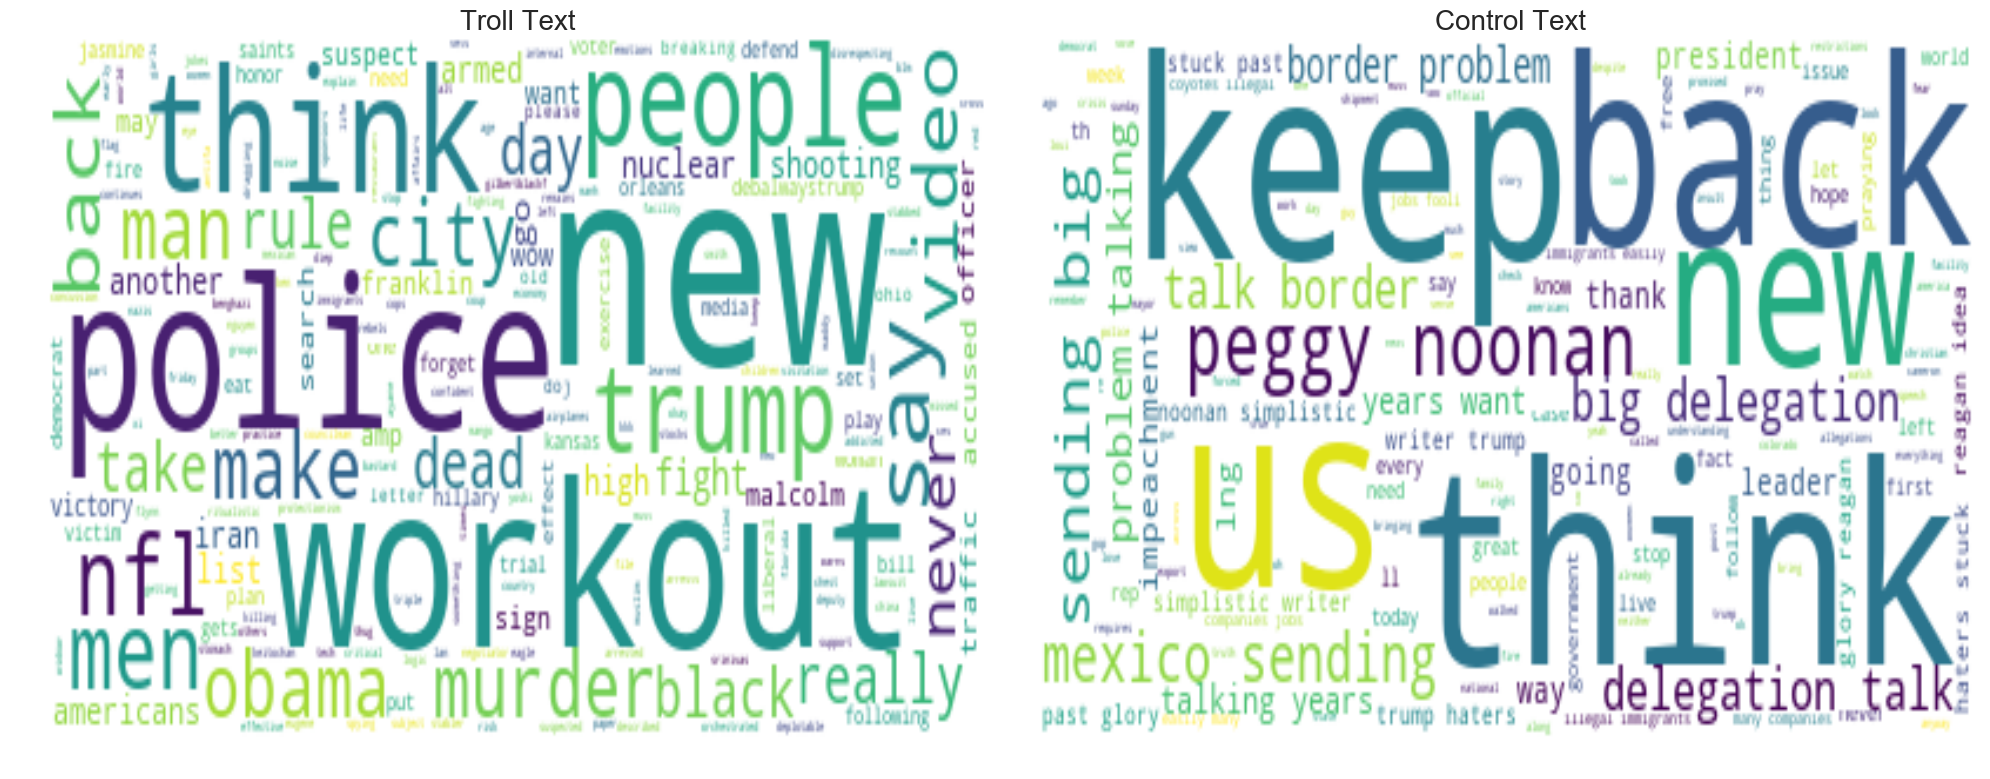

In [78]:
compare_word_cloud(text_troll_tokens,'Troll Text',text_contr_tokens,'Control Text')

### Lemmatizing

In [79]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
troll_lemma = [lemmatizer.lemmatize(w) for w in text_troll_tokens]
contr_lemma = [lemmatizer.lemmatize(w) for w in text_contr_tokens]

(<Figure size 2000x1500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C1E4A8908>,
       dtype=object))

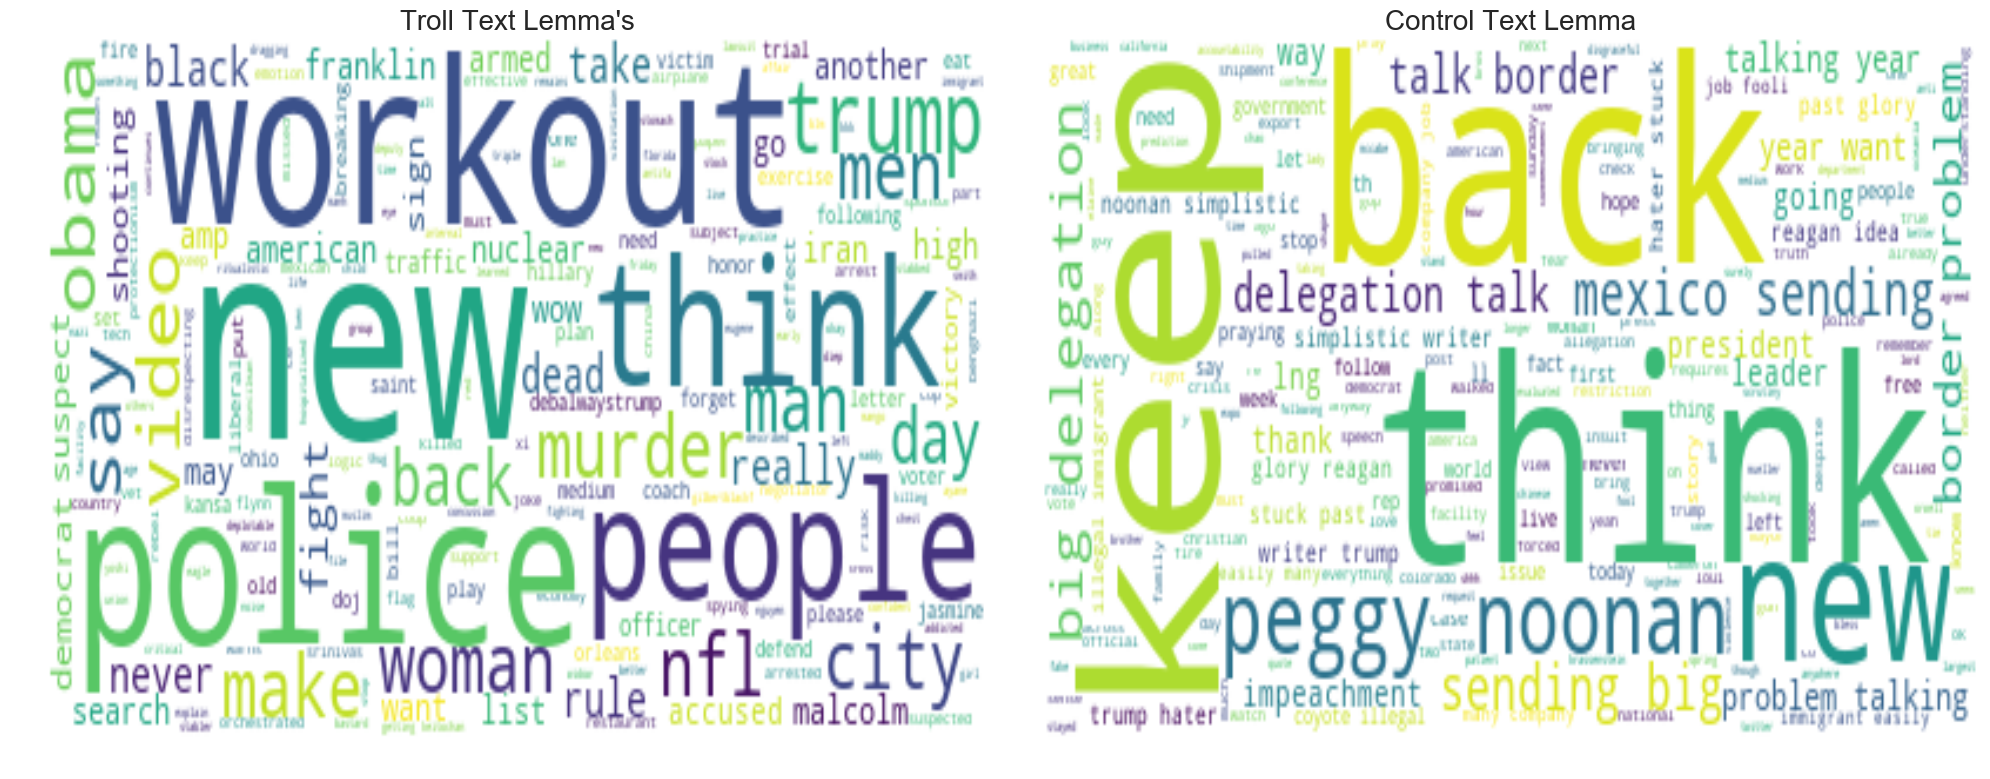

In [81]:
#...now what???
compare_word_cloud(troll_lemma,"Troll Text Lemma's",contr_lemma,"Control Text Lemma")

### Creating Bigrams and PMI scores

#### Bigrams

In [82]:
from nltk.collocations import *

In [174]:
def quick_table(tuples, col_names=None, caption =None):
    """Accepts a bigram output tuple of tuples and makes captioned table."""
    if col_names == None:
        
        df = pd.DataFrame.from_records(tuples)
        
    else:
        
        df = pd.DataFrame.from_records(tuples,columns=col_names)
        dfs = df.style.set_caption(caption)
        display(dfs)
            
    return df

quick_table(troll_scored,caption='Troll Tweets',col_names =['Bigram','PMI Score'] ).sort_by

Bigram  PMI Score
0                   (malcolm, x)   0.002789
1                    (need, new)   0.002789
2                 (new, orleans)   0.002789
3               (police, search)   0.002789
4                    (a, please)   0.001395
5             (aaron, hernandez)   0.001395
6               (according, cnn)   0.001395
7            (accused, dragging)   0.001395
8          (accused, mutilating)   0.001395
9            (acquired, qaddafi)   0.001395
10            (actually, really)   0.001395
11        (addicted, deplotable)   0.001395
12                    (af, base)   0.001395
13                (affairs, lan)   0.001395
14                  (age, eagle)   0.001395
15            (agencies, clears)   0.001395
16               (aint, touched)   0.001395
17               (airplanes, go)   0.001395
18   (alozrast, realdonaldtrump)   0.001395
19                   (alt, left)   0.001395
20                   (always, u)   0.001395
21              (americans, men)   0.001395
22    (americans, pameladeborah)   0.001395
23               (amp, children)   0.001395
24              (amp, democrats)   0.001395
25                  (amy, derek)   0.001395
26            (another, country)   0.001395
27                (another, way)   0.001395
28               (answer, asked)   0.001395
29                 (anthem, may)   0.001395
..                           ...        ...
682              (widow, others)   0.001395
683               (wife, xavier)   0.001395
684          (williams, emailed)   0.001395
685                   (win, new)   0.001395
686             (wishlist, make)   0.001395
687               (woman, found)   0.001395
688                (woman, gets)   0.001395
689                 (women, amp)   0.001395
690            (work, according)   0.001395
691       (workout, celebrating)   0.001395
692           (workout, clothes)   0.001395
693         (workout, completed)   0.001395
694      (workout, davideplante)   0.001395
695          (workout, gridlock)   0.001395
696              (workout, keep)   0.001395
697              (workout, plan)   0.001395
698             (world, economy)   0.001395
699                (would, long)   0.001395
700               (wow, ominous)   0.001395
701                  (wow, sign)   0.001395
702                (wreck, near)   0.001395
703                 (wrong, try)   0.001395
704                   (x, obama)   0.001395
705               (x, prominent)   0.001395
706                  (xavier, s)   0.001395
707                      (xi, g)   0.001395
708                  (year, old)   0.001395
709              (york, banking)   0.001395
710                   (yoshi, s)   0.001395
711                 (zika, link)   0.001395

[712 rows x 2 columns]

In [156]:
quick_table(troll_scored)==None

True

In [83]:
bigram_measures =nltk.collocations.BigramAssocMeasures()

troll_finder = BigramCollocationFinder.from_words(text_troll_tokens)
troll_scored = troll_finder.score_ngrams(bigram_measures.raw_freq)

contr_finder = BigramCollocationFinder.from_words(text_contr_tokens)
contr_scored = contr_finder.score_ngrams(bigram_measures.raw_freq)


In [84]:
troll_scored

[(('malcolm', 'x'), 0.002789400278940028),
 (('need', 'new'), 0.002789400278940028),
 (('new', 'orleans'), 0.002789400278940028),
 (('police', 'search'), 0.002789400278940028),
 (('a', 'please'), 0.001394700139470014),
 (('aaron', 'hernandez'), 0.001394700139470014),
 (('according', 'cnn'), 0.001394700139470014),
 (('accused', 'dragging'), 0.001394700139470014),
 (('accused', 'mutilating'), 0.001394700139470014),
 (('acquired', 'qaddafi'), 0.001394700139470014),
 (('actually', 'really'), 0.001394700139470014),
 (('addicted', 'deplotable'), 0.001394700139470014),
 (('af', 'base'), 0.001394700139470014),
 (('affairs', 'lan'), 0.001394700139470014),
 (('age', 'eagle'), 0.001394700139470014),
 (('agencies', 'clears'), 0.001394700139470014),
 (('aint', 'touched'), 0.001394700139470014),
 (('airplanes', 'go'), 0.001394700139470014),
 (('alozrast', 'realdonaldtrump'), 0.001394700139470014),
 (('alt', 'left'), 0.001394700139470014),
 (('always', 'u'), 0.001394700139470014),
 (('americans', 'me

#### Pointwise Mutual Information Score

In [173]:
quick_table(troll_scored)

0         1
0                   (malcolm, x)  0.002789
1                    (need, new)  0.002789
2                 (new, orleans)  0.002789
3               (police, search)  0.002789
4                    (a, please)  0.001395
5             (aaron, hernandez)  0.001395
6               (according, cnn)  0.001395
7            (accused, dragging)  0.001395
8          (accused, mutilating)  0.001395
9            (acquired, qaddafi)  0.001395
10            (actually, really)  0.001395
11        (addicted, deplotable)  0.001395
12                    (af, base)  0.001395
13                (affairs, lan)  0.001395
14                  (age, eagle)  0.001395
15            (agencies, clears)  0.001395
16               (aint, touched)  0.001395
17               (airplanes, go)  0.001395
18   (alozrast, realdonaldtrump)  0.001395
19                   (alt, left)  0.001395
20                   (always, u)  0.001395
21              (americans, men)  0.001395
22    (americans, pameladeborah)  0.001395
23               (amp, children)  0.001395
24              (amp, democrats)  0.001395
25                  (amy, derek)  0.001395
26            (another, country)  0.001395
27                (another, way)  0.001395
28               (answer, asked)  0.001395
29                 (anthem, may)  0.001395
..                           ...       ...
682              (widow, others)  0.001395
683               (wife, xavier)  0.001395
684          (williams, emailed)  0.001395
685                   (win, new)  0.001395
686             (wishlist, make)  0.001395
687               (woman, found)  0.001395
688                (woman, gets)  0.001395
689                 (women, amp)  0.001395
690            (work, according)  0.001395
691       (workout, celebrating)  0.001395
692           (workout, clothes)  0.001395
693         (workout, completed)  0.001395
694      (workout, davideplante)  0.001395
695          (workout, gridlock)  0.001395
696              (workout, keep)  0.001395
697              (workout, plan)  0.001395
698             (world, economy)  0.001395
699                (would, long)  0.001395
700               (wow, ominous)  0.001395
701                  (wow, sign)  0.001395
702                (wreck, near)  0.001395
703                 (wrong, try)  0.001395
704                   (x, obama)  0.001395
705               (x, prominent)  0.001395
706                  (xavier, s)  0.001395
707                      (xi, g)  0.001395
708                  (year, old)  0.001395
709              (york, banking)  0.001395
710                   (yoshi, s)  0.001395
711                 (zika, link)  0.001395

[712 rows x 2 columns]

In [143]:
troll_pmi_finder = BigramCollocationFinder.from_words(text_troll_tokens)
troll_pmi_finder.apply_freq_filter(2)

troll_pmi_scored = troll_pmi_finder.score_ngrams(bigram_measures.pmi)
troll_pmi_df = pd.DataFrame.from_records(troll_pmi_scored,columns=['Bigram','PMI Score'])
display(troll_pmi_df.style.set_caption('Troll Tweets'))

In [144]:
contr_pmi_finder = BigramCollocationFinder.from_words(text_contr_tokens)
contr_pmi_finder.apply_freq_filter(2)
contr_pmi_scored = contr_pmi_finder.score_ngrams(bigram_measures.pmi)

# contr_pmi_scored
contr_pmi_df = pd.DataFrame.from_records(contr_pmi_scored, columns=['Bigrams','PMI Score'])
display(contr_pmi_df.style.set_caption('Control Tweets'))

In [129]:
res_pmi

0         1
0        (export, facility)  8.899357
1          (facility, loui)  8.899357
2           (promised, two)  8.899357
3              (two, weeks)  8.899357
4              (weeks, ago)  8.899357
5              (ago, first)  8.314394
6        (coyotes, illegal)  8.314394
7         (first, shipment)  8.314394
8     (illegal, immigrants)  8.314394
9      (immigrants, easily)  8.314394
10          (left, cameron)  8.314394
11           (cameron, lng)  7.899357
12           (easily, many)  7.899357
13          (haters, stuck)  7.899357
14  (impeachment, requires)  7.899357
15            (jobs, fooli)  7.899357
16            (lng, export)  7.899357
17         (news, promised)  7.899357
18          (shipment, lng)  7.899357
19                  (t, co)  7.899357
20       (delegation, talk)  7.577429
21          (peggy, noonan)  7.577429
22       (problem, talking)  7.577429
23          (glory, reagan)  7.577429
24               (idea, is)  7.577429
25     (noonan, simplistic)  7.577429
26     (simplistic, writer)  7.577429
27        (companies, jobs)  7.484319
28        (many, companies)  7.484319
29        (mexico, sending)  7.314394
30              (lng, left)  7.314394
31            (past, glory)  7.314394
32            (stuck, past)  7.314394
33           (reagan, idea)  7.255501
34        (big, delegation)  7.092002
35        (border, problem)  7.092002
36           (sending, big)  7.092002
37           (talk, border)  7.092002
38         (talking, years)  7.092002
39            (years, want)  6.828968
40          (trump, haters)  6.577429
41          (writer, trump)  6.255501
42              (big, news)  6.092002
43                 (let, s)  5.992466

In [127]:
import bs_ds as bs
res_df = pd.DataFrame.(,)
res_df

SyntaxError: invalid syntax (<ipython-input-127-739d52eaccb8>, line 2)

___

## Switching to Bigger-Picture Metrics 

### Vectorization-
- to do these tasks, must do tokenziation and other cleaning steps in the original dataframe so structure/context is not lost

- for this section, we will leave the hashtags and @'s in the messages, and will only remove url links
- will leave stopwords in for now

In [103]:
# Tokenizing dataframe text
df_sm_contr['content'].map(lambda x: nltk.regexp_tokenize(x,pattern))
df_sm_troll['content'].map(lambda x: nltk.regexp_tokenize(x,pattern))

# Removing url links
df_sm_contr['content'].map(lambda x: urls.sub(' ', x))
df_sm_troll['content'].map(lambda x: urls.sub(' ', x))

# Removing hastags links
df_sm_contr['content'].map(lambda x: hashtags.sub(' ', x))
df_sm_troll['content'].map(lambda x: hashtags.sub(' ', x))

# Removing mentions links
df_sm_contr['content'].map(lambda x: mentions.sub(' ', x))
df_sm_troll['content'].map(lambda x: mentions.sub(' ', x))

# Removing only specific over-represented words 
# i.e. RT, @RealDonaldTrump?
remove_words = re.compile(r'[.?]RT[.?]')

date_published
2016-08-28 12:58:00    Iran arrests nuclear negotiator suspected of s...
2015-07-12 07:30:00      Very effective workout, keep at it @Batdump ...
2016-01-08 14:50:00           Paper airplanes go high-tech at CES  #tech
2016-09-04 12:28:00    China's Xi at G20 says world economy at risk, ...
2016-08-23 13:29:00    #ICantBeUrFriendBecause you subject jokes to e...
2017-09-25 18:54:00    List of NFL Sponsors Who Support Disrespecting...
2017-02-14 23:36:00    #Flynnghazi? I must have missed the part where...
2017-02-06 17:40:00    2 men arrested after shooting into Mexican res...
2015-08-07 07:12:00    FRANKLIN @HUNSandTWUNS Srinivas @srinivas_vred...
2015-08-07 08:06:00    Maddy @maddythecatlady Ayane @Wakanabot Keitoc...
2017-05-04 10:57:00                            Wow. Sign of the times…  
2015-08-05 03:55:00    #TopNews Florida triple murder may have been r...
2016-04-18 13:46:00    I can explain how to live with bastard! #Hilla...
2015-02-09 16:54:00    So early in m

In [115]:
troll_content = df_sm_troll['content'].to_list()
contr_content = df_sm_contr['content'].to_list()
troll_content[:3], contr_content[:3]

(['Iran arrests nuclear negotiator suspected of spying  #news',
  'http://t.co/tLDdgIAsWc Very effective workout, keep at it @Batdump @m_gon14 @MariahYoumans @baaabygirlxo @valerie_33697 @hannahcarmella',
  'Paper airplanes go high-tech at CES  #tech'],
 ['RT @realDonaldTrump: BIG NEWS! As I promised two weeks ago, the first shipment of LNG has just left the Cameron LNG Export Facility in Loui…',
  'RT @deray: We evaluated the 100 largest police departments in California re: police violence and accountability. Remember, we have all the…',
  '@Bpierc4 @davidmweissman @realDonaldTrump Yeah you pulled that out of your ass. Shhh.'])

### Using Word2Vec

In [146]:
help(troll_model)

Help on Word2Vec in module gensim.models.word2vec object:

class Word2Vec(gensim.models.base_any2vec.BaseWordEmbeddingsModel)
 |  Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.
 |  
 |  Once you're finished training a model (=no more updates, only querying)
 |  store and use only the :class:`~gensim.models.keyedvectors.KeyedVectors` instance in `self.wv` to reduce memory.
 |  
 |  The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save` and
 |  :meth:`~gensim.models.word2vec.Word2Vec.load` methods.
 |  
 |  The trained word vectors can also be stored/loaded from a format compatible with the
 |  original word2vec implementation via `self.wv.save_word2vec_format`
 |  and :meth:`gensim.models.keyedvectors.KeyedVectors.load_word2vec_format`.
 |  
 |  Some important attributes are the following:
 |  
 |  Attributes
 |  ----------
 |  wv : :class:`~gensim.models.keyedvectors.Word2VecKeyedVectors`
 |      This object essen

In [106]:
from gensim.models import Word2Vec
# troll_text_2vec = 
troll_model = Word2Vec(df_sm_troll['content'], size=100, window=5, min_count=1, workers=4)
contr_model = Word2Vec(df_sm_contr['content'], size=100, window=5, min_count=1, workers=4)

troll_model.train(df_sm_troll['content'], total_examples=troll_model.corpus_count, epochs=10 )
contr_model.train(df_sm_contr['content'], total_examples=contr_model.corpus_count, epochs=10 )

(37157, 136760)

# BOOKMARK - LOAD HERE -  -  - Starting with Keras

In [1]:
import bs_ds as bs
from bs_ds.imports import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Keras preprocessing
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

# Keras neural network basics
from keras import models
from keras import layers
from keras import optimizers

df = pd.read_csv('combined_troll_and_control_tweets_en.csv')

df.set_index('date_published',inplace=True)
df.head()
tweets = df['content']

bs_ds v. 0.7.4 ... read the docs at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Module/Package Handle
pandas                               pd
numpy                                np
matplotlib                          mpl
matplotlib.pyplot                   plt
seaborn                             sns

Using TensorFlow backend.
C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

account_category account_type  author  \
date_published                                              
2017-10-01 19:58:00       RightTroll        Right  10_GOP   
2017-10-01 22:43:00       RightTroll        Right  10_GOP   
2017-10-01 23:52:00       RightTroll        Right  10_GOP   
2017-10-01 02:47:00       RightTroll        Right  10_GOP   
2017-10-01 02:52:00       RightTroll        Right  10_GOP   

                                                               content  \
date_published                                                           
2017-10-01 19:58:00  "We have a sitting Democrat US Senator on tria...   
2017-10-01 22:43:00  Marshawn Lynch arrives to game in anti-Trump s...   
2017-10-01 23:52:00  JUST IN: President Trump dedicates Presidents ...   
2017-10-01 02:47:00  Dan Bongino: "Nobody trolls liberals better th...   
2017-10-01 02:52:00  '@SenatorMenendez @CarmenYulinCruz Doesn't mat...   

                     external_author_id  followers  following language  \
date_published                                                           
2017-10-01 19:58:00        9.060000e+17     9636.0     1052.0  English   
2017-10-01 22:43:00        9.060000e+17     9637.0     1054.0  English   
2017-10-01 23:52:00        9.060000e+17     9642.0     1062.0  English   
2017-10-01 02:47:00        9.060000e+17     9644.0     1050.0  English   
2017-10-01 02:52:00        9.060000e+17     9644.0     1050.0  English   

                    post_type     publish_date   region  retweet  troll_tweet  \
date_published                                                                  
2017-10-01 19:58:00       NaN  10/1/2017 19:58  Unknown        0            1   
2017-10-01 22:43:00       NaN  10/1/2017 22:43  Unknown        0            1   
2017-10-01 23:52:00       NaN  10/1/2017 23:52  Unknown        0            1   
2017-10-01 02:47:00       NaN   10/1/2017 2:47  Unknown        0            1   
2017-10-01 02:52:00       NaN   10/1/2017 2:52  Unknown        0            1   

                     updates  
date_published                
2017-10-01 19:58:00    253.0  
2017-10-01 22:43:00    254.0  
2017-10-01 23:52:00    256.0  
2017-10-01 02:47:00    247.0  
2017-10-01 02:52:00    249.0

In [5]:
bs.inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
Index: 1311933 entries, 2017-10-01 19:58:00 to 2019-06-03 00:09:23
Data columns (total 14 columns):
account_category      1311933 non-null object
account_type          1311587 non-null object
author                1311933 non-null object
content               1311933 non-null object
external_author_id    1311933 non-null float64
followers             1311933 non-null float64
following             1272847 non-null float64
language              1311933 non-null object
post_type             39086 non-null object
publish_date          1311933 non-null object
region                1296623 non-null object
retweet               1311933 non-null int64
troll_tweet           1311933 non-null int64
updates               1272847 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 150.1+ MB


None

# of Identified Null Values: Null values Total Values Percent Column 
 
 account_category 
 0 
 1311933 
 0 
 
 
 account_type 
 346 
 1311933 
 0.026 
 
 
 author 
 0 
 1311933 
 0 
 
 
 content 
 0 
 1311933 
 0 
 
 
 external_author_id 
 0 
 1311933 
 0 
 
 
 followers 
 0 
 1311933 
 0 
 
 
 following 
 39086 
 1311933 
 2.979 
 
 
 language 
 0 
 1311933 
 0 
 
 
 post_type 
 1272847 
 1311933 
 97.02 
 
 
 publish_date 
 0 
 1311933 
 0 
 
 
 region 
 15310 
 1311933 
 1.167 
 
 
 retweet 
 0 
 1311933 
 0 
 
 
 troll_tweet 
 0 
 1311933 
 0 
 
 
 updates 
 39086 
 1311933 
 2.979 
 
   # of Detected Numeric Values in "Object" columns: Numeric values Total Values Percent Column 
 
 author 
 3 
 1311933 
 0 
 
 
 content 
 1 
 1311933 
 0 
 
 
 region 
 37 
 1311933 
 0 
 
 
 
 
 
 external_author_id 
 followers 
 following 
 retweet 
 troll_tweet 
 updates 
 
 
 
 
 count 
 1.3119e+06 
 1.3119e+06 
 1.2728e+06 
 1311933.0 
 1.3119e+06 
 1.2728e+06 
 
 
 mean 
 2.0328e+17 
 1.0129e+04 
 5.7781e+03 
 0.0 
 9.7021e-01 
 1.3014e+04 
 
 
 std 
 3.7044e+17 
 5.3838e+04 
 7.1134e+03 
 0.0 
 1.7001e-01 
 1.5167e+04 
 
 
 min 
 4.9990e+03 
 0.0000e+00 
 0.0000e+00 
 0.0 
 0.0000e+00 
 1.0000e+00 
 
 
 25% 
 2.6012e+09 
 5.0300e+02 
 9.8100e+02 
 0.0 
 1.0000e+00 
 1.6090e+03 
 
 
 50% 
 2.9449e+09 
 4.0350e+03 
 4.5830e+03 
 0.0 
 1.0000e+00 
 7.8340e+03 
 
 
 75% 
 4.4372e+09 
 1.6057e+04 
 8.1050e+03 
 0.0 
 1.0000e+00 
 1.9448e+04 
 
 
 max 
 1.1354e+18 
 4.2023e+07 
 7.6210e+04 
 0.0 
 1.0000e+00 
 1.6610e+05

account_category account_type  author  \
date_published                                              
2017-10-01 19:58:00       RightTroll        Right  10_GOP   
2017-10-01 22:43:00       RightTroll        Right  10_GOP   
2017-10-01 23:52:00       RightTroll        Right  10_GOP   

                                                               content  \
date_published                                                           
2017-10-01 19:58:00  "We have a sitting Democrat US Senator on tria...   
2017-10-01 22:43:00  Marshawn Lynch arrives to game in anti-Trump s...   
2017-10-01 23:52:00  JUST IN: President Trump dedicates Presidents ...   

                     external_author_id  followers  following language  \
date_published                                                           
2017-10-01 19:58:00          9.0600e+17     9636.0     1052.0  English   
2017-10-01 22:43:00          9.0600e+17     9637.0     1054.0  English   
2017-10-01 23:52:00          9.0600e+17     9642.0     1062.0  English   

                    post_type     publish_date   region  retweet  troll_tweet  \
date_published                                                                  
2017-10-01 19:58:00       NaN  10/1/2017 19:58  Unknown        0            1   
2017-10-01 22:43:00       NaN  10/1/2017 22:43  Unknown        0            1   
2017-10-01 23:52:00       NaN  10/1/2017 23:52  Unknown        0            1   

                     updates  
date_published                
2017-10-01 19:58:00    253.0  
2017-10-01 22:43:00    254.0  
2017-10-01 23:52:00    256.0

In [49]:
X_contr = df.groupby('troll_tweet').get_group(0)[['content','troll_tweet']]
# X_contr = dfX
# y_contr = df.groupby('troll_tweet').get_group(0)['troll_tweet']

X_troll = df.groupby('troll_tweet').get_group(1)[['content','troll_tweet']]
X_troll = X_troll.sample(len(X_contr))

X = pd.concat([X_contr, X_troll],axis=0)
y = X.pop('troll_tweet')

# y_troll = X_troll.pop('troll_tweet')


# print(X_tr.shape, X_co.shape)

In [53]:
X.shape

(78172, 1)

In [54]:
# X_contr.shape, X_troll.shape, y_troll.shape, y_contr.shape
X_train,X_train, y_train,y_test = train_test_split(X,y,test_size=0.3)

In [55]:
text_sequences = X_train

In [56]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [63]:
sequences[2]

IndexError: list index out of range

In [59]:
def make_model(vocab_size, seq_len):
    model = models.Sequential()
    model.add(layers.Embedding(vocab_size,25,input_length=seq_len))
    model.add(LSTM(150, return_sequences=True))
    model.add(LSTM(150))
    model.add(Dense(150, activation='relu'))
    
#     model.add(Dense(vocab_size, activation = 'softmax'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy')
    
    model.summary()

In [60]:
import keras 
from keras import models, layers, optimizers
from keras.utils import to_categorical

In [ ]:
model=create_model()

In [ ]:
from pandas_profiling import ProfileReport
one_hot_results= []
ProfileReport(df)

In [6]:
one_hot_results= tokenizer.texts_to_matrix(tweets, mode='binary') #Similar to sequences, but returns a numpy array
print('one_hot_results type:', type(one_hot_results))

word_index = tokenizer.word_index #Useful if we wish to decode (more explanation below)

print('Found %s unique tokens.' % len(word_index)) #Tokens are the number of unique words across the corpus


print('Dimensions of our coded results:', np.shape(one_hot_results)) #Our coded data

KeyboardInterrupt: 

## BOOKMARK prior : WHY is 2 cells below coming out as single characters?

In [108]:
wv_tr = troll_model.wv
wv_co = contr_model.wv

In [111]:
wv_tr.vocab

{'I': <gensim.models.keyedvectors.Vocab at 0x20c5e647908>,
 'r': <gensim.models.keyedvectors.Vocab at 0x20c5e647470>,
 'a': <gensim.models.keyedvectors.Vocab at 0x20c5e647e48>,
 'n': <gensim.models.keyedvectors.Vocab at 0x20c5e647f98>,
 ' ': <gensim.models.keyedvectors.Vocab at 0x20c5e647f28>,
 'e': <gensim.models.keyedvectors.Vocab at 0x20c5e647fd0>,
 's': <gensim.models.keyedvectors.Vocab at 0x20c5e647d30>,
 't': <gensim.models.keyedvectors.Vocab at 0x20c5e647828>,
 'u': <gensim.models.keyedvectors.Vocab at 0x20c5e647e80>,
 'c': <gensim.models.keyedvectors.Vocab at 0x20c5e6475c0>,
 'l': <gensim.models.keyedvectors.Vocab at 0x20c5e647780>,
 'g': <gensim.models.keyedvectors.Vocab at 0x20c5e647c18>,
 'o': <gensim.models.keyedvectors.Vocab at 0x20c5e647eb8>,
 'i': <gensim.models.keyedvectors.Vocab at 0x20c5e647400>,
 'p': <gensim.models.keyedvectors.Vocab at 0x20c5e647898>,
 'd': <gensim.models.keyedvectors.Vocab at 0x20c5e647ef0>,
 'f': <gensim.models.keyedvectors.Vocab at 0x20c5e6478d0

In [145]:
# wv_tr.most_similar()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

tf_idf_data_train

### Part-of-Speech Tags

In [ ]:
import nltk
nltk.pos_tag(tokenized_sent)


# Visualizations
- check out Kate's link https://ai.googleblog.com/2016/12/open-sourcing-embedding-projector-tool.html
## Generate Word Clouds

In [41]:
def compare_word_cloud(text1,label1,text2,label2):
    from wordcloud import WordCloud
    wordcloud1 = WordCloud(max_font_size=80, max_words=200, background_color='white').generate(' '.join(text1))
    wordcloud2 = WordCloud(max_font_size=80, max_words=200, background_color='white').generate(' '.join(text2))


    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,15))
    ax[0].imshow(wordcloud1, interpolation='bilinear')
    ax[0].set_aspect(1.5)
    ax[0].axis("off")
    ax[0].set_title(label1, fontsize=20)

    ax[1].imshow(wordcloud2, interpolation='bilinear')
    ax[1].set_aspect(1.5)
    ax[1].axis("off")
    ax[1].set_title(label2, fontsize=20)

    fig.tight_layout()
    return fig,ax

(<Figure size 2000x1500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE686FFEF0>,
       dtype=object))

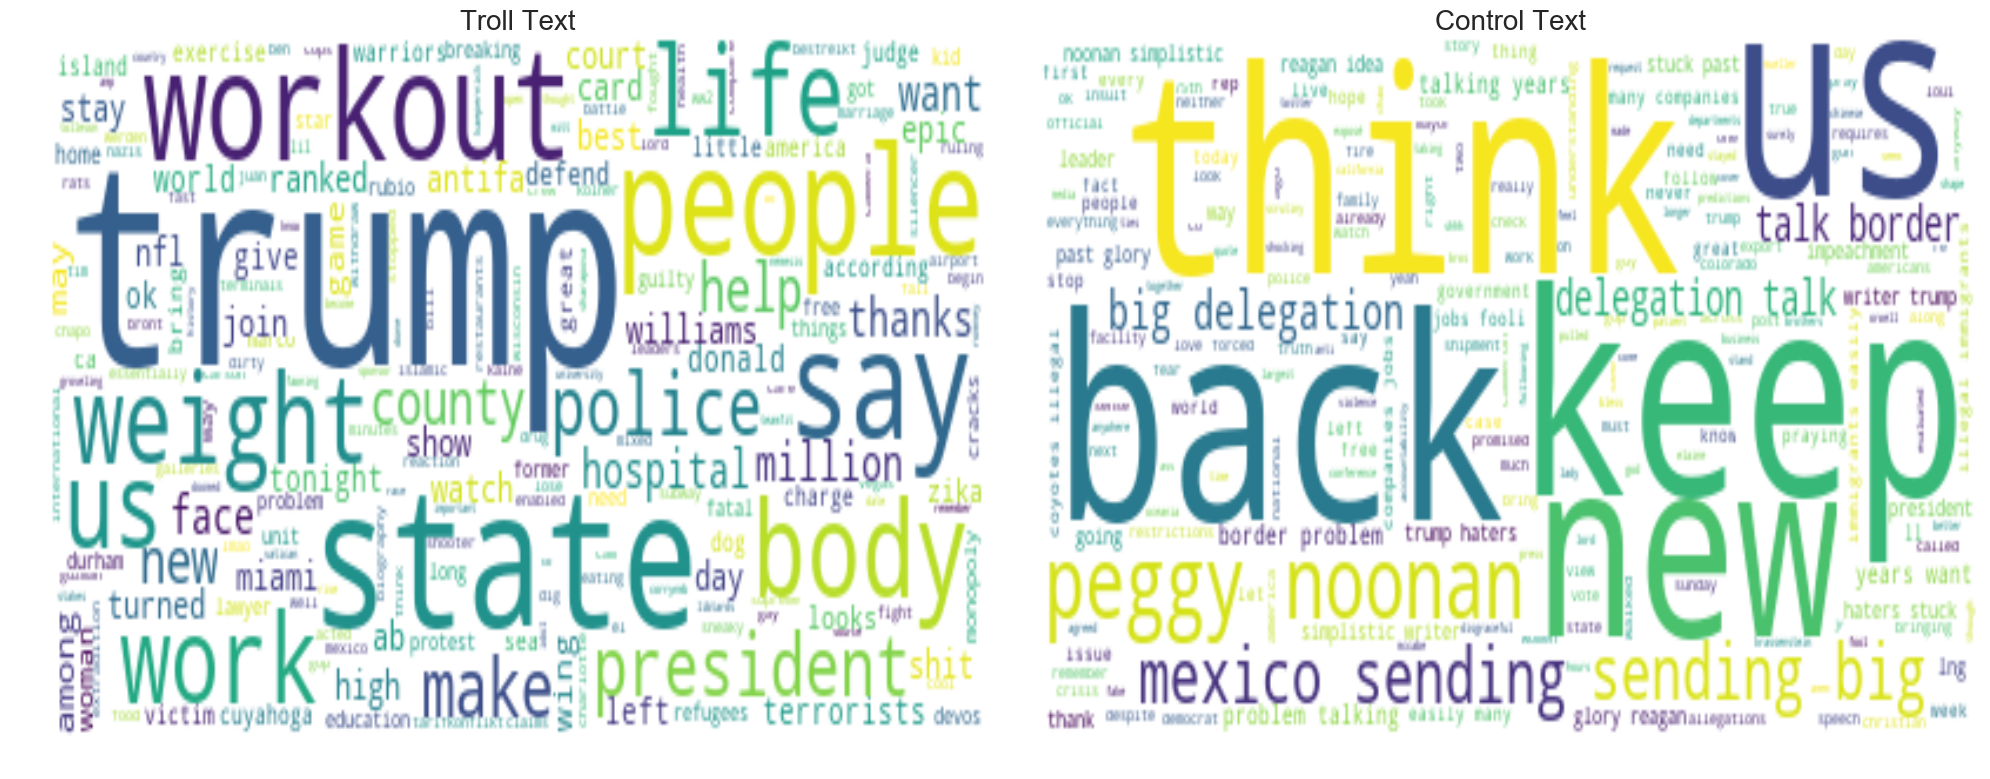

In [333]:
compare_word_cloud(text_troll_tokens,'Troll Text',text_contr_tokens,'Control Text')

(<Figure size 2000x1500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE686E4668>,
       dtype=object))

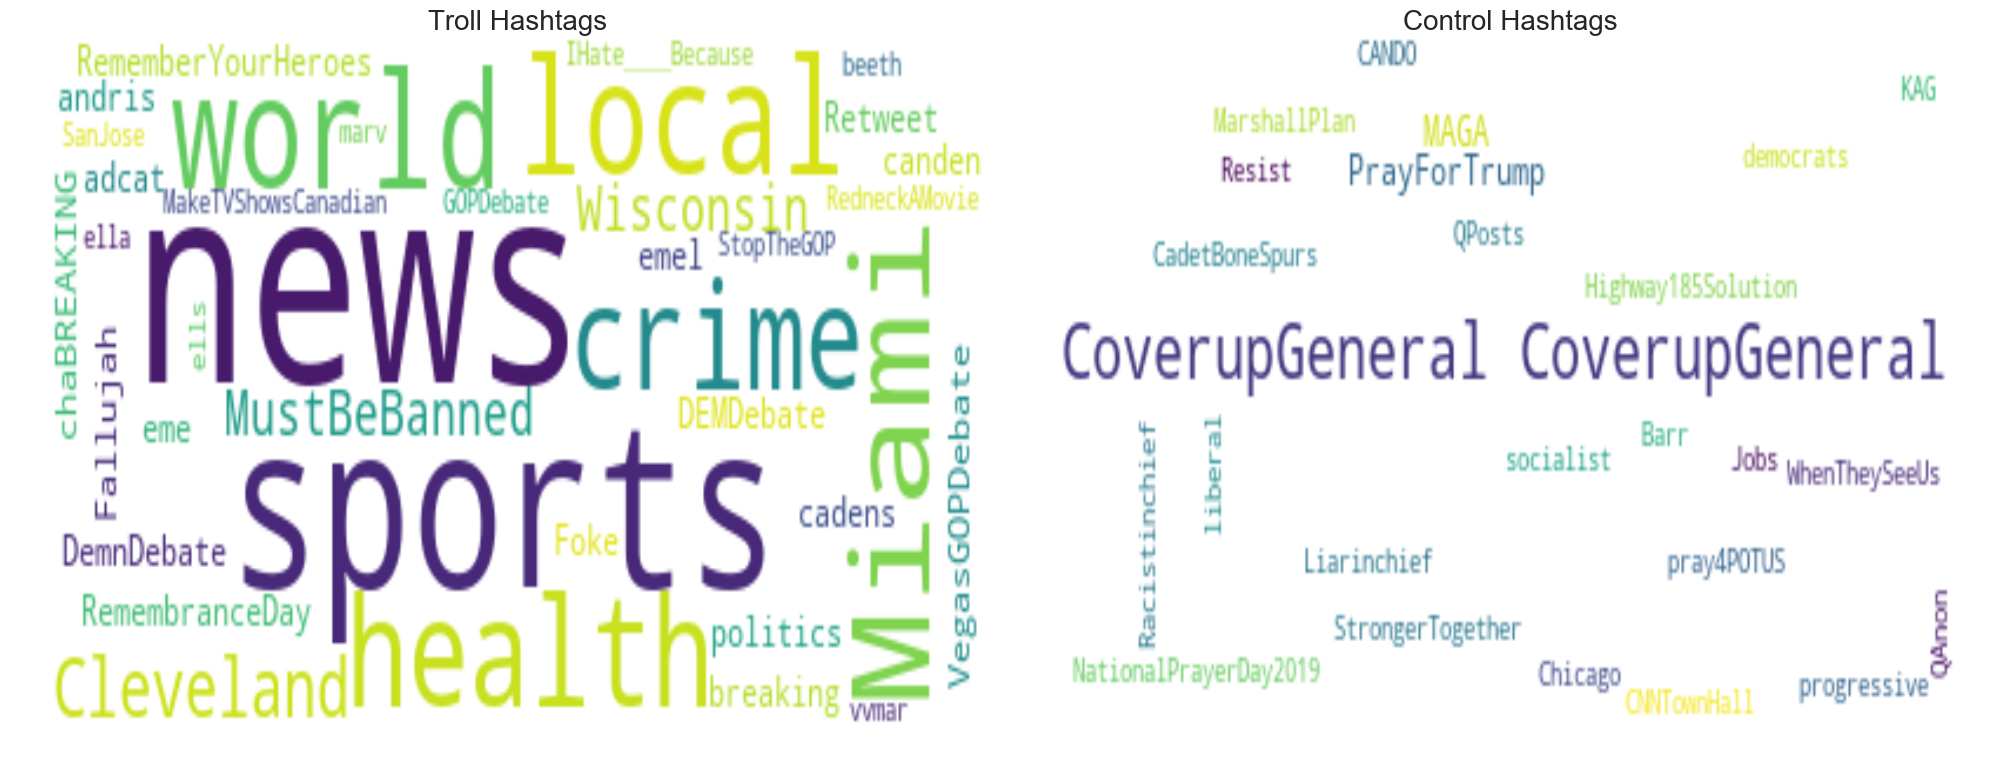

In [335]:
compare_word_cloud(troll_tags,'Troll Hashtags',control_tags,'Control Hashtags')

(<Figure size 2000x1500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDD30EC198>,
       dtype=object))

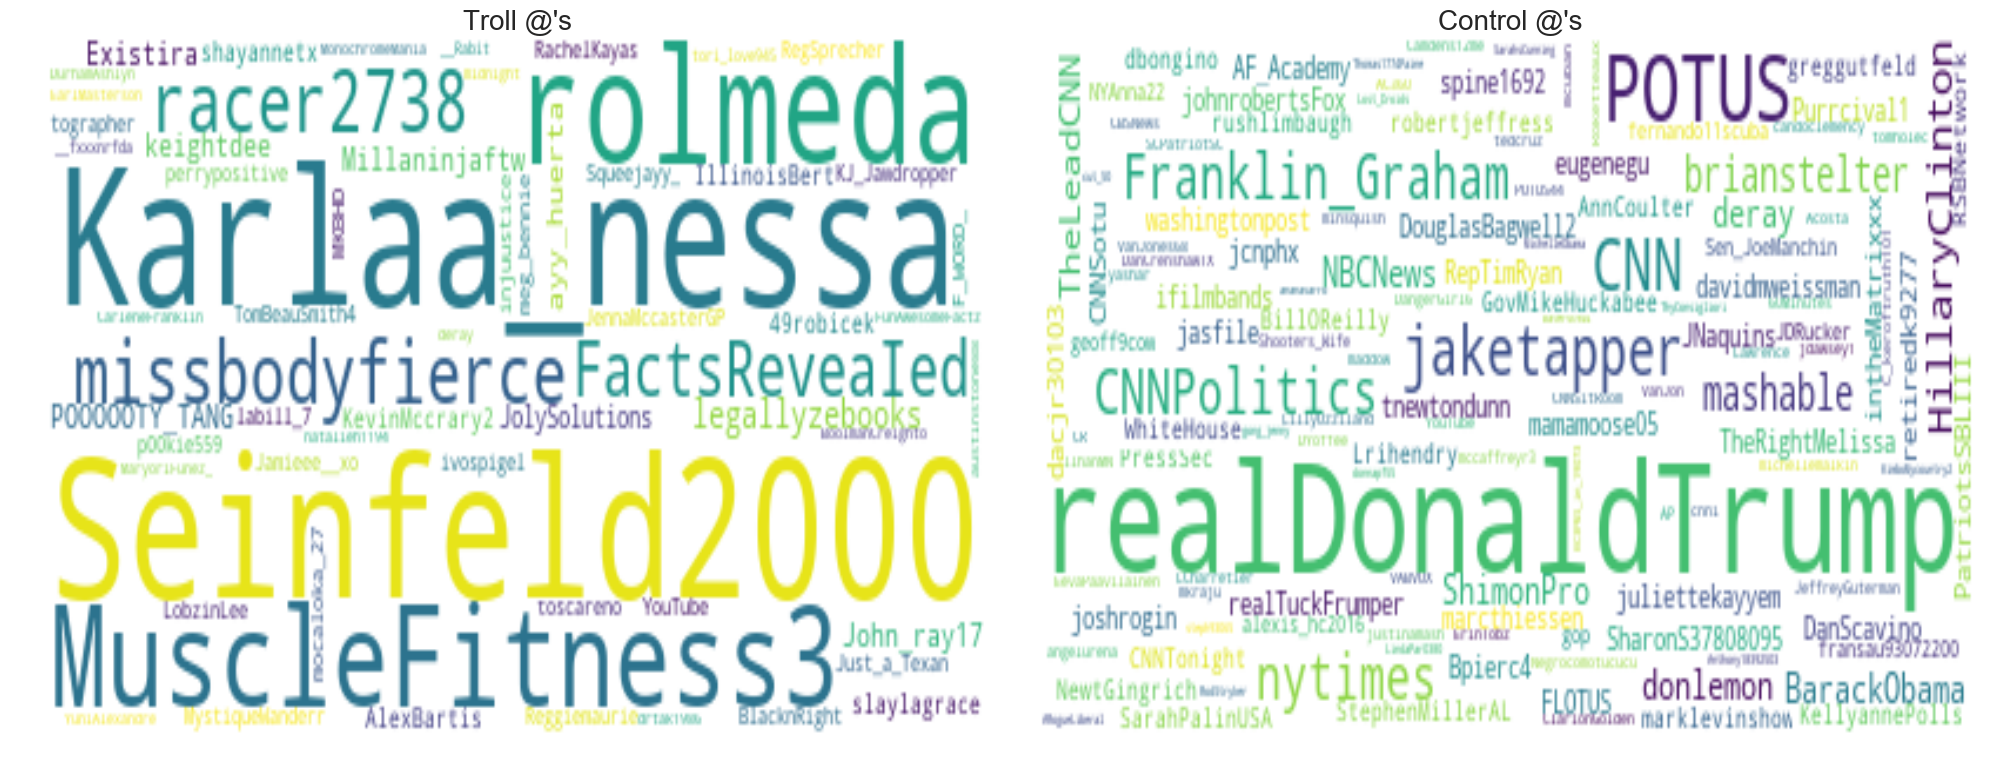

In [336]:
compare_word_cloud(troll_mentions,"Troll @'s",control_mentions,"Control @'s")

## TSNE FOR 3D COMPARISON PLOTS OF TFIDF

First, we need to pull the words out of the dictionaries stored in tf_idf_all_docs so that only the values remain, and store them in lists instead of dictionaries. This is because the t-SNE object only works with Array-like objects, not dictionaries.

In the cell below, create a list of lists that contains a list representation of the values of each of the dictionaries stored in tf_idf_all_docs. The same structure should remain--e.g. the first list should contain only the values that were in the 1st dictionary in tf_idf_all_docs, and so on.
```python
tf_idf_vals_list = []

for i in tf_idf_all_docs:
    tf_idf_vals_list.append(list(i.values()))
    
tf_idf_vals_list[0][:10]
```

In [ ]:
# Make tf_idf_vals_list


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

t_sne_object_3d = TSNE(n_components=3)
transformed_data_3d = t_sne_object_3d.fit_transform(tf_idf_vals_list)
transformed_data_3d


# Visualizing with TSNE
kendrick_3d = transformed_data_3d[10:]
k3_x = [i[0] for i in kendrick_3d]
k3_y = [i[1] for i in kendrick_3d]
k3_z = [i[2] for i in kendrick_3d]

garth_3d = transformed_data_3d[:10]
g3_x = [i[0] for i in garth_3d]
g3_y = [i[1] for i in garth_3d]
g3_z = [i[2] for i in garth_3d]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(k3_x, k3_y, k3_z, c='b', s=60, label='Kendrick')
ax.scatter(g3_x, g3_y, g3_z, c='red', s=60, label='Garth')

ax.view_init(30, 10)
ax.legend()
plt.show()
```

# Generating Word Embeddings

- [ ] Need to use apply to apply the hashtag, url, and mentions regex's to the whole dataframe 

In [384]:
# Combining all regular expressions operations for convenience
import re
url = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")
hashtag = re.compile(r'(\#\w*)')
mentions = re.compile(r'(\@\w*)')

df_troll_clean = df_sm_troll.copy()
df_contr_clean = df_sm_contr.copy()

df_troll_clean['content'].apply(lambda x: url.sub(' ',x))
df_contr_clean['content'].apply(lambda x: url.sub(' ',x))

df_troll_clean['content'].apply(lambda x: hashtag.sub(' ',x))
df_contr_clean['content'].apply(lambda x: hashtag.sub(' ',x))

df_troll_clean['content'].apply(lambda x: mentions.sub(' ',x))
df_contr_clean['content'].apply(lambda x: mentions.sub(' ',x))

date_published
2019-06-03 01:57:10    RT  : BIG NEWS! As I promised two weeks ago, t...
2019-06-03 01:18:36    RT  : We evaluated the 100 largest police depa...
2019-06-02 18:19:30          Yeah you pulled that out of your ass. Shhh.
2019-06-02 18:21:45    RT  :   The fake media did not cover the fact ...
2019-06-03 01:43:50      Great quote.   As the predictions of Orwell ...
2019-06-03 02:03:41    RT  : This   exposé on Elaine Chao and her fam...
2019-06-01 22:24:40                The more I think about it, the mor...
2019-06-02 17:22:12            Agreed Lord! Amen! 🙏❤\nGod Bless you, ...
2019-06-02 18:19:56      The Krassenstein brothers are no longer on T...
2019-06-02 18:33:12        You’ve just made yourself an official fool...
2019-06-02 18:27:19    RT  : President   stayed after his commencemen...
2019-06-03 02:04:12    RT  : On this week’s State of the Cartoonion: ...
2019-06-02 16:28:09            I pray your potUS gets explosive diarrhea
2019-06-02 18:21:01    RT  : The Wal

In [376]:
np.random.choice(df_sm_troll['content']),np.random.choice(df_sm_contr['content'])

('Watch as Antifa HUNTS DOWN a Trump Supporter to Beat Him Unconscious https://t.co/gDjZskveiU #beeth https://t.co/oTyMFu89S8',
 'RT @realDonaldTrump: ....Coyotes and Illegal Immigrants, which they can do very easily, or our many companies and jobs that have been fooli…')

In [377]:
from nltk import word_tokenize
from gensim.models import Word2Vec
data_tr = df_troll_clean['content'].map(word_tokenize)
data_co = df_contr_clean['content'].map(word_tokenize)

In [378]:
model_tr = Word2Vec(data_tr, size=100, window=5, min_count=1, workers=4)
model_co = Word2Vec(data_co, size=100, window=5, min_count=1, workers=4)

In [379]:
model_tr.train(data_tr, total_examples=model.corpus_count, epochs=10)
model_co.train(data_co, total_examples=model.corpus_count, epochs=10)

(19311, 27210)

In [380]:
wvtr = model_tr.wv
wvco = model_co.wv

In [381]:
wvtr.most_similar('Trump')

[(',', 0.7090815901756287),
 (':', 0.7076240181922913),
 ('’', 0.7022097110748291),
 ('https', 0.6979113817214966),
 ('@', 0.695167064666748),
 ('to', 0.6941143274307251),
 ('#', 0.6822593808174133),
 ("n't", 0.6629782915115356),
 ('at', 0.662548840045929),
 ('for', 0.6461422443389893)]

In [45]:
## Original way to make X a list of all strings  
# X = [str(i) for i  in df_small['content']]
# y = list(df_small['troll_tweet'])
# print('X:',type(X), len(X))
# print('y:',type(y),len(y))

### Using Feature Engineerging for Text Data lesson

In [ ]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

In [ ]:
import string
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','“','’','”','...','``']

In [ ]:
#print(stopwords_list)

In [ ]:
from nltk import word_tokenize
X_strings = ' '.join(X)
tokens = word_tokenize(X_strings)

In [ ]:
'“' in stopwords_list

In [ ]:
stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list]

In [ ]:
from nltk import FreqDist
freqdist = FreqDist(stopped_tokens)
freqdist.most_common(50)

### Attempting to Use Spacy to create 2 differnt doc objects

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [60]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_lg')

In [61]:
X_text = ' '.join(X_train)
doc = nlp(X_text)

In [ ]:
doc.

In [65]:
# displacy.render(doc, style='dep',jupyter=True, options={'distance':110})

In [51]:
# docTroll = nlp(df_small['content'].loc[df_small['troll_tweet']==True])

In [75]:
# X_train_vect.shape
for i in range(len(X_train)):
    curr = X_train[i]
    
    if type(curr)=='str':
        print(i,X_train[i])

In [ ]:
df_small['content'][4]